In [1]:
from Transformer.layers import PositionalEncoding
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

Text(33.0, 0.5, 'max_seq_len')

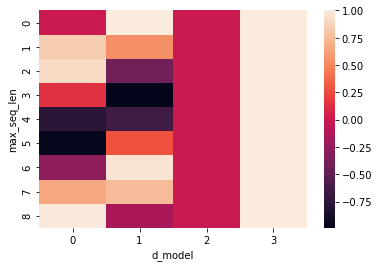

In [31]:
PE = PositionalEncoding(max_seq_len=9,
                        d_model=4)
df= pd.DataFrame(PE.PE.numpy())

s = sns.heatmap(df,)
s.set_xlabel('d_model', fontsize=10)
s.set_ylabel('max_seq_len', fontsize=10)

In [32]:
df

,0,1,2,3
0,0.000000,1.000000,0.0000,1.0
1,0.841471,0.540302,0.0001,1.0
2,0.909297,-0.416147,0.0002,1.0
3,0.141120,-0.989992,0.0003,1.0
4,-0.756802,-0.653644,0.0004,1.0
5,-0.958924,0.283662,0.0005,1.0
6,-0.279415,0.960170,0.0006,1.0
7,0.656987,0.753902,0.0007,1.0
8,0.989358,-0.145500,0.0008,1.0


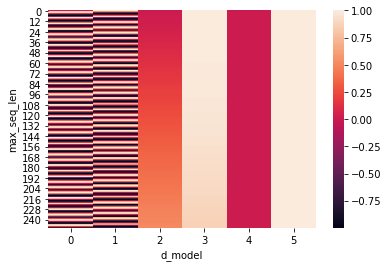

In [118]:
PE = PositionalEncoding(max_seq_len=250,
                        d_model=6)
df= pd.DataFrame(PE.PE.numpy())

s = sns.heatmap(df,)
s.set_xlabel('d_model', fontsize=10)
s.set_ylabel('max_seq_len', fontsize=10)

PE_vectors = PE.PE.numpy()

In [97]:
df

,0,1,2,3
0,0.000000,1.000000,0.000000,1.000000
1,0.841471,0.540302,0.000100,1.000000
2,0.909297,-0.416147,0.000200,1.000000
3,0.141120,-0.989992,0.000300,1.000000
4,-0.756802,-0.653644,0.000400,1.000000
...,...,...,...,...
245,-0.044213,0.999022,0.024498,0.999700
246,0.816760,0.576978,0.024598,0.999697
247,0.926807,-0.375538,0.024697,0.999695
248,0.184752,-0.982785,0.024797,0.999692


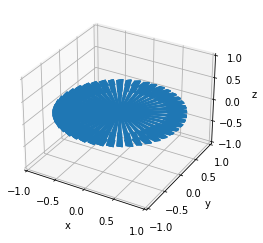

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

vectors=np.array( [np.append([0, 0, 0], v) for v in  PE_vectors[:, :4]]) 
#vectors=np.array( [ [0,0,1,1,-2,0], [0,0,2,1,1,0],[0,0,3,2,1,0],[0,0,4,0.5,0.7,0]]) 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for vector in vectors:
    v = np.array([vector[3],vector[4],vector[5]])
    vlength=np.linalg.norm(v)
    ax.quiver(vector[0],vector[1],vector[2],vector[3],vector[4],vector[5],
            pivot='tail',length=vlength,arrow_length_ratio=0.3/vlength)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [121]:
PE.PE.unsqueeze(0)[:, : 2, :].size()

torch.Size([1, 2, 6])

# Studying Positional Encoder on Actual Data

In [123]:
import pickle

with open('dataset/Europarl.en.pkl', 'rb') as jar:
    europarl_english = pickle.load(jar)
    
tokens = europarl_english['tokens']
vocabulary = europarl_english['vocabulary']

In [130]:
list_len = [len(i) for i in tokens]
max_sentence_len = max(list_len)
print(max_sentence_len)

1031


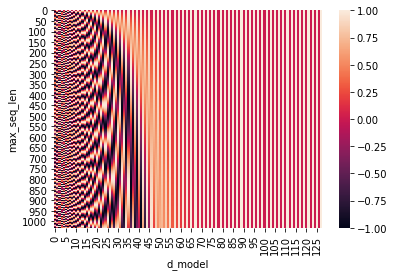

In [131]:
PE = PositionalEncoding(max_seq_len=max_sentence_len,
                        d_model=128)
df= pd.DataFrame(PE.PE.numpy())

s = sns.heatmap(df,)
s.set_xlabel('d_model', fontsize=10)
s.set_ylabel('max_seq_len', fontsize=10)

PE_vectors = PE.PE.numpy()

In [132]:
from torch.nn import Embedding

In [133]:
embd = Embedding(len(vocabulary), 128)

In [138]:
from torch import Tensor

In [139]:
Tensor(tokens[:5])

ValueError: too many dimensions 'str'

In [ ]:
def _num_token(data: list):
    assert (data)

In [134]:
embd(tokens[:5])

TypeError: embedding(): argument 'indices' (position 2) must be Tensor, not list